# Computing and plotting the time mean and standard deviation per depth level of properties area-averaged over the DCA

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import datetime
from datetime import timedelta
from scipy import interpolate
import seaborn as sns
sns.set_style('dark')
from info import datadir, figdir

In [2]:
data = sio.loadmat(datadir+'timedepth_DCA.mat')

time = data['time'][0]
depth = data['depth'][0]
p = data['p'][0]

SA = data['SA']
CT = data['CT']
sigma0 = data['sigma0']

In [3]:
SA_mean = np.mean(SA,axis=0)
SA_std = np.std(SA,axis=0)
CT_mean = np.mean(CT,axis=0)
CT_std = np.std(CT,axis=0)
sigma0_mean = np.mean(sigma0,axis=0)
sigma0_std = np.std(sigma0,axis=0)

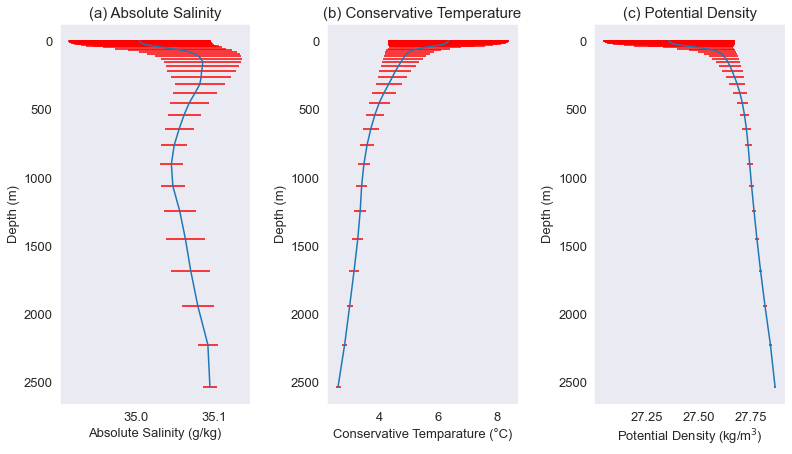

In [4]:
# Per depth value
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,7))

ax1.errorbar(SA_mean,depth,xerr=SA_std,ecolor='red')
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (m)',fontsize=13)
ax1.set_xlabel('Absolute Salinity (g/kg)',fontsize=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.set_title('(a) Absolute Salinity',fontsize=15)

ax2.errorbar(CT_mean,depth,xerr=CT_std,ecolor='red')
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_ylabel('Depth (m)',fontsize=13)
ax2.set_xlabel('Conservative Temparature ('+'\u00B0'+'C)',fontsize=13)
ax2.tick_params(axis='both', labelsize=13)
ax2.set_title('(b) Conservative Temperature',fontsize=15)

ax3.errorbar(sigma0_mean,depth,xerr=sigma0_std,ecolor='red')
ax3.set_ylim(ax3.get_ylim()[::-1])
ax3.set_ylabel('Depth (m)',fontsize=13)
ax3.set_xlabel('Potential Density (kg/m$^3$)',fontsize=13)
ax3.tick_params(axis='both', labelsize=13)
ax3.set_title('(c) Potential Density',fontsize=15)

plt.subplots_adjust(wspace=0.4)

plt.savefig(figdir+'variations_depth.pdf',bbox_inches='tight')
plt.show()

In [5]:
max_depth_ind = np.where(depth>500)[0][0]
fraction = sigma0_std[max_depth_ind]/sigma0_std[0]
print('The standard deviation of density at 600 m depth is %.1f'%(fraction*100)+
      '% of the standard deviation at the surface')

The standard deviation of density at 600 m depth is 7.3% of the standard deviation at the surface


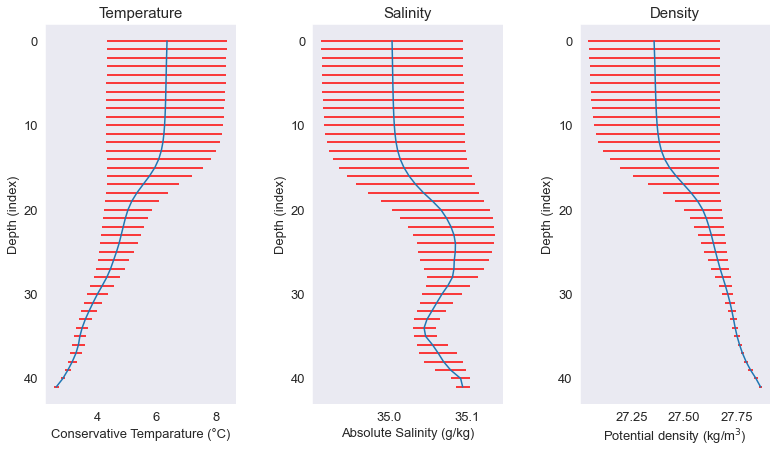

In [6]:
# Per depth level index
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,7))

ax1.errorbar(CT_mean,range(len(depth)),xerr=CT_std,ecolor='red')
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Depth (index)',fontsize=13)
ax1.set_xlabel('Conservative Temparature ('+'\u00B0'+'C)',fontsize=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.set_title('Temperature',fontsize=15)

ax2.errorbar(SA_mean,range(len(depth)),xerr=SA_std,ecolor='red')
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_ylabel('Depth (index)',fontsize=13)
ax2.set_xlabel('Absolute Salinity (g/kg)',fontsize=13)
ax2.tick_params(axis='both', labelsize=13)
ax2.set_title('Salinity',fontsize=15)

ax3.errorbar(sigma0_mean,range(len(depth)),xerr=sigma0_std,ecolor='red')
ax3.set_ylim(ax3.get_ylim()[::-1])
ax3.set_ylabel('Depth (index)',fontsize=13)
ax3.set_xlabel('Potential density (kg/m$^3$)',fontsize=13)
ax3.tick_params(axis='both', labelsize=13)
ax3.set_title('Density',fontsize=15)

plt.subplots_adjust(wspace=0.4)

#plt.savefig(figdir+'variations_index.png')
plt.show()